<center><img src="images/ML_video_w_s.webp" style="margin: 20 auto;"></center>
<p style="font-family: Protomolecule; font-size: 2.3em; line-height: 90%; margin: 0 auto; text-align: center; width: 100%;"><span style="letter-spacing: .1rem;">Machine</span><br><span style="letter-spacing: -.1rem;">Learning</span></p>
<p class="author" style="font-family: Protomolecule; margin: 0px auto;  text-align: center; width: 100%; font-size: 1.2em;">Joern Ploennigs</p>
<p class="subtitle" style="font-family: Protomolecule; font-size: larger; margin: 1em auto; text-align: center; width: 100%; font-size: 1.2em;">Statistische Datenanalyse</p>

# Statistische Datenanalyse

![](images/midjourney_one_world.png)
> Wir haben nur eine Welt, aber wir brauchen mehr als einen Weg, um sie zu verstehen.
> 
> — Robert Merton

Nachdem man sich mit einem neuen Datensatz vertraut gemacht hat, extrahiert man meist einige Statistiken, die dazu dienen den Datensatz zusammenzufassen, Plausibilitäten zu prüfen und relevante Erkenntnisse für die spätere Modellierung abzuleiten, wie Verteilungsformen.

## <a href="/lec_slides/06_Descriptive_Statistics.slides.html">Folien</a>
<iframe src="/lec_slides/06_Descriptive_Statistics.slides.html" width="750" height="500"></iframe>

## Einfache beschreibende Statistiken

### Minimum, Maximum und der beobachtete Wertebereich

Wir explorieren in diesem Notebook den Wetterdatensatz aus Warnemünde und laden ihn mit:

In [ ]:
import numpy as np # Import von NumPy
import pandas as pd # Import von Pandas

wetter = pd.read_csv("../data/Wetter/warnemuende_1960.csv", sep=';')
wetter.shape

Das Minimum und Maximum sind eine intuitive Statistik, die den kleinsten und größten Wert in einem Datensatz angeben. Wir können beide direkt bestimmen mit:

In [3]:
wetter.TMK.min(), wetter.TMK.max() 

(-14.8, 27.8)

Das Minimum und Maximum sind besonders sinnvoll zur Plausibilitätsprüfung des Datensatzes. Hieraus lässt sich der beobachtete Wertebereich berechnen durch:

In [31]:
wetter.TMK.max() - wetter.TMK.min()

42.6

Der beobachtete Wertebereich ist ein sehr einfaches Maß für die Streuung in einem Datensatz, allerdings nicht sehr robust. 

<div class="alert alert-block alert-warning">
<b>Achtung: Robustheit von Minimum und Maximum</b>

Es ist wichtig zu beachten, dass das beobachtete Minimum, Maximum und der daraus folgende Wertebereich nicht den realen Grenzen entsprechen muss. Unter der Annahme das die Daten statistisch verteilt sind, liegen Minimum und Maximum häufig in Bereichen der Verteilung, die nur selten auftreten und folglich beobachtet werden. Es ist immer davon auszugehen, dass die realen Grenzwerte davon abweichen und einfach nur nicht beobachtet worden sind.

Nehmen wir als Beispiel die Temperatur. Aus der Physik ist bekannt, dass diese zwischen dem absoluten Nullpunkt bei -273,15 °C und der vermuteten maximalen Planck-Temperatur von 1,42x10<sup>32</sup> °C liegen kann. Das ist der reale Wertebereich. Beide Temperaturen konnten allerdings noch nie gemessen werden und somit sollten sie in einem Messdatensatz nicht auftreten.
</div>

### Mittelwert

Der arithmetische Mittelwert, oder Durchschnitt, ist ein beliebtes Maß für das Lagemaß. Mit dem Lagemaß beschreibt man die "typischen" Werte in einem Datensatz. Sie folgen aus der_zentralen Tendenz_ vieler Wahrscheinlichkeitsverteilungen, dass die Werte um ein zentralen Wert liegen.

Der arithmetische Mittelwert entspricht der Summe aller Werte im Datensatz geteilt durch die Anzahl der Werte im Datensatz. Also, wenn wir Werte in einem Datensatz haben und sie Werte haben ..., ist der Stichprobenmittelwert in der Regel durch den Buchstaben dargestellt. Die Formel ist:

$$
\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i.
$$

Der Mittelwert ist ein Modellwert des Datensatzes. Es ist der Wert, der prinzipiell am häufigsten vorkommt. Sie werden jedoch feststellen, dass der Mittelwert oft nicht einer der tatsächlichen Werte ist, die Sie in Ihrem Datensatz beobachtet haben. Eine seiner wichtigen Eigenschaften ist jedoch, dass er den Fehler bei der Vorhersage eines beliebigen Werts in Ihrem Datensatz minimiert. Das heißt, es ist der Wert, der den geringsten Fehler im Vergleich zu allen anderen Werten im Datensatz erzeugt. Eine wichtige Eigenschaft des Mittelwerts ist, dass er jeden Wert in Ihrem Datensatz als Teil der Berechnung einschließt. Darüber hinaus ist der Mittelwert das einzige Maß für die zentrale Tendenz, bei dem die Summe der Abweichungen jedes Werts vom Mittelwert immer 0 ist.

Der Mittelwert lässt sich in Pandas für jede Spalte mit der Methode `mean` direkt berechnen. Bestimmen wir für die Lufttemperatur in unserem Wetterdatensatz ergibt sich

In [5]:
wetter.TMK.mean()

8.47518379803024

Es war also im Schnitt 8.47°C.

### Median

Der Mittelwert hat einen Hauptnachteil: Er ist besonders anfällig für den Einfluss von Ausreißern. Dies sind Werte, die im Vergleich zum Rest des Datensatzes ungewöhnlich sind, indem sie besonders klein oder groß im numerischen Wert sind. Betrachten wir zum Beispiel die Löhne der Mitarbeiter in einer Fabrik unten:

In [6]:
gehalt = [15, 18, 16, 14, 15, 15, 12, 17, 90, 95] # in Tausend
np.mean(gehalt)

30.7

Der durchschnittliche Gehalt für diese zehn Mitarbeiter beträgt `30,7` Tausend. Allerdings die Daten, dass dieser Durchschnittswert möglicherweise nicht der beste Weg ist, um das typische Gehalt eines Arbeitnehmers widerzuspiegeln, da die meisten Gehälter im Bereich von 12 bis 18 Tausend liegen. Der Mittelwert wird durch die beiden hohen Gehälter verzerrt. Daher braucht man einen _robusteres_ Lagemaß für die zentrale Tendenz. Deshalb verwendet man in solchen Fällen meist den _Median_.

Ein weiterer Zeitpunkt, an dem wir in der Regel den Median gegenüber dem Mittelwert bevorzugen, ist, wenn unsere Daten schief sind (d. h. die Häufigkeitsverteilung unserer Daten ist schief). Wenn wir die Normalverteilung betrachten - da dies in der Statistik am häufigsten bewertet wird - sind der Mittelwert, der Median und der Modus identisch, wenn die Daten perfekt normal sind. Darüber hinaus stellen sie alle den typischsten Wert im Datensatz dar. Wenn die Daten jedoch schief werden, verliert der Mittelwert seine Fähigkeit, den besten zentralen Ort für die Daten zu liefern, da die schiefen Daten ihn vom typischen Wert wegziehen. Der Median behält jedoch am besten diese Position bei und wird nicht so stark von den schiefen Werten beeinflusst. Dies wird später im Abschnitt zur Schiefe genauer erläutert. In beiden Fällen nutzt man deshalb den Median.

Der Median ist der mittlere Wert für eine Reihe von Daten, die nach ihrer Größe geordnet wurden. Der Median wird weniger von Ausreißern und schiefen Daten beeinflusst. 

Prinzipiell können wir ihn berechnen, indem wir die Werte zuerst der Größe nach sortieren:

In [7]:
gehalt.sort()
gehalt

[12, 14, 15, 15, 15, 16, 17, 18, 90, 95]

und dann den mittleren Wert auswählen, der sich aus der Länge berechnet

In [8]:
gehalt[len(gehalt) // 2]

16

Ist die Länge der Werte ungerade so bildet man den Durchschnitt aus beiden in der Mitte liegenden Werte.

Der Einfachheit halber können wir den Median für eine Spalte direkt mit Pandas berechnen. Bei der Temperatur in dem Wetter Datensatz ergibt sich auch ein leicht unterschiedlicher Wert im Vergleich zum Mittelwert, nämlich

In [9]:
wetter.TMK.median()

8.6

Der mittelste Wert in unserem Datensatz war also 8.6°C und somit etwas kälter als der Mittelwert von 8.75°C.

### Standardabweichung und Varianz

Ein wichtiges Kriterium zur Beschreibung von Daten ist neben der zentralen Tendenz die Streuung der Daten. Der Grund ist, dass der Mittelwert oder der Median uns zwar eine Vorstellung des "typischen" Wertes geben aber keine Information, wie stark die realen Werte davon abweichen. 

In einem Datensatz mit einer großen Streuung ist der Mittelwert oder der Median nicht mehr sehr aussagekräftig. Wir haben das im Beispiel der Gehälter gesehen. Wo wir mit dem Median zwar wissen, dass diese um 16 Tausend liegen, aber dadurch auch ausblenden, dass die Gehälter bis zu 96 Tausend reichen.

Deshalb gibt man bei Daten meist die Varianz $s^2$ oder die Standartabweichung $s$ die sich wie folgt berechnen

$$
s^2 = \frac{1}{n -1} \sum_{i=1}^{n} (x_i - \bar{x})^2, \\
s = \sqrt{s^2}.
$$

Die Formel zeigt, dass die Varianz $s^2$ das quadratische Abweichungsmaß der einzelnen Datenpunkte vom arithmetischen Mittel ist. Die Varianz ist ein Fehlermaß, wie weit die einzelnen Datenpunkte von diesem Mittelwert entfernt sind. 

Die Standardabweichung $s$ ist die Quadratwurzel der Varianz und gibt somit die durchschnittliche Abweichung der Datenpunkte vom Mittelwert in den ursprünglichen Einheiten der Daten an. Sie ist ein Maß für die Streuung der Datenpunkte um den Mittelwert. Die Standardabweichung ist oft intuitiver zu interpretieren, da sie direkt in den ursprünglichen Einheiten der Daten gemessen wird, während die Varianz in Quadraten dieser Einheiten gemessen wird.

In Pandas können wir beide Werte berechnen mit

In [10]:
wetter.TMK.var(), wetter.TMK.std()

(48.71576448133568, 6.97966793489029)

Wir sehen an der Standardabweichung, dass die Temperatur im Durchschnitt um 6.9°C vom Mittelwert abweicht. Da die Varianz quadratisch ist, ist sie für Menschen schlechter zu interpretieren. Man benutzt sie dennoch zum Vergleichen, da durch die Quadratur, stärkere Abweichungen betont werden und sie so im Vergleich besser herausstechen. Eine Eigenschaft die später bei der Berechnung und der Bewertung von ML-Modellen relevant sein wird.

### Schiefe
Die Schiefe ist ein Maß für die Asymmetrie der Datenverteilung. Ist die Schiefe 0 so sind die Werte symmetrisch um den Median verteilt. Ist die Schiefe negativ so streuen die Werte die kleiner als der Median sind mehr, was den arithmetischen  Mittelwert auf diese Seite verschiebt. Bei einer positiven Schiefe streuen sie mehr auf der rechten Seite. Die Schiefe ist ein gutes Indiz für bestimmte Wahrscheinlichkeitsverteilungen.

Die Schiefe wird berechnet durch

$$
g = \frac{1}{n} \sum_{i=1}^n \left( \frac{ x_i - \bar{x} }{s} \right)^3.
$$

Die Schiefe lässt sich auch in Pandas direkt berechnen. Für die Temperatur bestätigt sich jetzt unsere Beobachtung, die wir beim Vergleich von Median und Mittelwert gemacht haben, nämlich, dass die Verteilung etwas linksschief ist.

In [11]:
wetter.TMK.skew()

-0.21288392100379444

### Wölbung
Der Wölbung oder Kurtosis ist ein Maß für die Spitzigkeit oder Flachheit einer Verteilung und ein Maß für die Abweichung von der Normalverteilung. Da viele ML-Modelle von normalverteilten Werten ausgehen, können Daten mit einer großen Kurtosis problematisch sein. Hier spricht man auch von Long-Tail-Verteilungen, also Verteilungen, die nicht schnell abflachen. Deshalb kann man sie im Data-Cleaning nicht gut abschneiden, um Außreißer zu entfernen und den Datensatz zu normalisieren, was wiederum numerische Problem mit sich führen kann. Spätestens wenn solche Probleme auftreten, sollte man sich die Kurtosis genauer ansehen.

Die Kurtosis wird berechnet durch

$$
w = \frac{1}{n} \sum_{i=1}^n \left(\frac{x_i-\bar{x}}{s}\right)^4.
$$

Vergleicht man die Formeln für Mittelwert, Varianz, Schiefe und Wölbung so zeigt sich ein Muster, das sich immer nur der Exponent ändert. Deshalb spricht man auch von dem ersten, zweiten, dritten und viertem statistischen Moment. Sie lassen sich auch durch eine gemeinsame Formel auf Basis des Erwartungswertes $\operatorname{E}$ beschreiben.

$$
 \mu_k = \operatorname{E}\left[\left(X-\mu\right)^k\right].
$$

Für die Temperatur haben wir eine Kurtosis von `-0.7`. Das ist nicht problematisch. Werte für eine Schiefe zwischen -2 und 2 und einer Kurtosis zwischen ‐7 und +7 gelten als akzeptabel, um immer noch eine Normalverteilung anzunehmen {cite:p}`byrne2013structural`, {cite:p}`kline2023principles`, {cite:p}`hair2010multivariate`.

In [12]:
wetter.TMK.kurt()

-0.7045900367551634

### Quartile, IQR und Quartile & Perzentile

Die Diskussion der Robustheit des beobachteten Wertebereichs und des arithmetischen Mittelwertes, dass diese statistischen Größen anfällig sind gegenüber Ausreißern. Das trift auch auf die Varianz und die Standardabweichung zu. Gerade die quadratische Berechnung der Varianz überbetont solche Ausreißer. Deshalb braucht man Größen, die robuster reagieren, so genannte Quantile und Perzentile.

Die _Quartile_ berechnen sich ähnlich zum der Median, bloß dass wir nicht den mittelsten Wert aus dem sortierten Datensatz wählen, sondern den Bereich in vier Teile teilen, wodurch das Q1-Quartile 25% der Daten kleiner sind, bei Q2-Quartile 50% der Daten kleiner sind (Median), und beim Q3-Quartile 75% der Daten drunter liegen. Wenn wir die Berechnungsvorschrift auf den Gehaltsdatensatz anwenden, so folgt:

In [13]:
gehalt = np.sort(gehalt)
Q1 = gehalt[len(gehalt) // 4 * 1]
Q2 = gehalt[len(gehalt) // 4 * 2]
Q3 = gehalt[len(gehalt) // 4 * 3]
Q1, Q2, Q3

(15, 15, 17)

Dadurch das die 15 beim Q1 und Q2 vorkommt sehen wir schon, dass das ein häufiger Wert ist und aus dem 17 des Q3 folgt, dass der Datensatz rechtsschief ist.

Wenn wir den Datensatz nicht nur in vier Teile teilen sondern in 100 Teile, so, haben wir _Quantile_. Ein $p$-_Quantil_ beschreibt, dass der Anteil $p$ von 100 Teilen unter dem bestimmten Wert liegt. Es liegt nahe $p$ in Prozent anzugeben und dann spricht man von _Perzentilen_. Nehmen wir zum Beispiel das 95%-Perzentil, so bedeutet das, dass 95 Prozent der Werte kleiner und 5 Prozent der Werte größer als das Perzentil sind. Damit sind Quantile auch eine generische Darstellung vom Quartilen (25%, 50%, 75%), Median (50%) und Minimum (0%) und Maximum (100%).

Perzentile lassen sich in Pandas wie gewohnt einfach berechnen, indem wir den gewünschten Prozentwert angeben.

In [14]:
wetter.TMK.quantile(0.25)

3.0

Wir können auch gleich mehrere Werte angeben.

In [15]:
t_min, t_01, t_Q1, t_median, t_Q3, t_99, t_max = wetter.TMK.quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1.0])

Hier bestimmen wir auch das 1%-Perzentil und das 99%-Perzentil. Solche Werte werden alternativ zum Minimum und Maximum verwendet, weil sie insbesondere bei größeren Datensätzen weniger betroffen von Ausreißern sind.

Als letztes statistische Maß betrachten wir den _Inter-Quartil-Abstand_ (_IQR_). Er ist weniger empfindlich gegenüber Ausreißern als die Standardabweichung und wird alternativ als robustes Streuungsmaß verwendet. Der IQR misst die Spannweite der mittleren 50% der Daten, oder anders gesagt die Differenz des Q3-Quartils bei 75% und des Q1-Quartils bei 25%.

In [16]:
t_IQR = t_Q3 - t_Q1
t_IQR 

11.5

Aufgrund seiner robusten Eigenschaften wird der IQR gerne zur Identifikation von Ausreißern benutzt. Dabei nimmt man an das Werte die mehr als 1,5 IQR (oder 3 IQR wenn man vorsichtig ist) vom 1. oder 3. Quantil entfernt sind, als Ausreißer angesehen werden können. Wenn wir das für die Temperatur bestimmen, so ergibt sich ein Ausreißer von `-14.8` °C der 1956 gemessen worden ist.

In [17]:
wetter[(wetter.TMK < t_Q1 - 1.5 * t_IQR) | (wetter.TMK > t_Q3 + 1.5 * t_IQR)]

STATIONS_ID  MESS_DATUM  QN_3   FX   FM  QN_4  RSK  RSKF  SDK  SHK_TAG  \
3328         4271    19560215     5 -999  1.9     5  0.0     8  4.3       20   

       NM  VPM      PM   TMK   UPM   TXK   TNK   TGK  eor  
3328  2.4  1.9  1010.0 -14.8  91.0 -10.1 -16.6 -24.0  eor

Viele von den bisher besprochenen Kenngrößen lassen sich in Pandas auch mit einer einzigen Funktion für alle numerischen Spalten bestimmen, so dass man es sich sparen kann die ganzen Funktionen auf jede Spalte anzuwenden:

In [18]:
wetter.describe()

STATIONS_ID    MESS_DATUM         QN_3      FX           FM  \
count       7209.0  7.209000e+03  7209.000000  7209.0  7209.000000   
mean        4271.0  1.956450e+07  -350.557220  -999.0  -350.524858   
std            0.0  5.698321e+04   480.198395     0.0   480.226313   
min         4271.0  1.947010e+07  -999.000000  -999.0  -999.000000   
25%         4271.0  1.951121e+07  -999.000000  -999.0  -999.000000   
50%         4271.0  1.956112e+07     5.000000  -999.0     3.200000   
75%         4271.0  1.961102e+07     5.000000  -999.0     5.100000   
max         4271.0  1.966093e+07     5.000000  -999.0    17.500000   

              QN_4          RSK         RSKF          SDK      SHK_TAG  \
count  7209.000000  7209.000000  7209.000000  7209.000000  7209.000000   
mean      4.998890  -200.553600  -200.723956  -197.993217  -201.350118   
std       0.112971   401.895432   401.799677   403.189369   401.487143   
min       1.000000  -999.000000  -999.000000  -999.000000  -999.000000   
25%       5.000000     0.000000     0.000000     0.000000     0.000000   
50%       5.000000     0.000000     1.000000     1.800000     0.000000   
75%       5.000000     0.900000     1.000000     7.200000     0.000000   
max       9.000000    61.600000     8.000000    16.600000    35.000000   

                NM          VPM           PM          TMK          UPM  \
count  7209.000000  7209.000000  7209.000000  7209.000000  7209.000000   
mean   -197.498571     9.917589  1012.982300     8.475184    83.138022   
std     403.422698     4.099224     9.929346     6.979668    14.291333   
min    -999.000000     1.500000   968.400000   -14.800000    42.000000   
25%       1.000000     6.700000  1007.000000     3.000000    77.000000   
50%       5.000000     9.200000  1013.200000     8.600000    84.000000   
75%       7.200000    13.100000  1019.500000    14.500000    90.000000   
max       8.000000    25.500000  1046.400000    27.800000  1000.000000   

               TXK          TNK          TGK  
count  7209.000000  7209.000000  7209.000000  
mean     11.481565     5.604231     4.015245  
std       7.831148     6.562490     6.700793  
min     -11.800000   -18.400000   -25.700000  
25%       5.100000     0.800000    -0.500000  
50%      11.700000     5.700000     4.300000  
75%      17.800000    11.100000     9.500000  
max      35.000000    20.200000    18.700000

## Verteilungsformen

Die Kenntnis verschiedener statistischer Verteilungen ist für die Datenanalyse von Bedeutung. Wenn man die Verteilungsform und ihre Parameter von Variablen kennt, so kann man auf die Entstehungsprozesse schließen und die Daten auch synthetisch erzeugen, was z.B. wichtig für Simulationen ist.

### Kontinuierliche Verteilungen
#### Normalverteilung

Die Normalverteilung, auch Gaußsche Glockenkurve genannt, ist eine symmetrische Verteilung mit einem Maximum in der Mitte und abnehmenden Wahrscheinlichkeiten in den Flanken. Sie ist die am häufigsten vorkommende Verteilung in der Natur. Das ist unter anderem auf den zentralen Grenzwertsatz zurückzuführen:

<div class="alert alert-block alert-success">
<b>Definition: Zentrale-Grenzwertsatz</b>

Der zentrale Grenzwertsatz von Lindeberg-Lévy besagt, dass wenn wir viele unabhängige Zufallsvariablen addieren, unabhängig von ihrer ursprünglichen Verteilung, die Summe dieser Zufallsvariablen tendenziell einer Normalverteilung folgt, wenn die Anzahl der Zufallsvariablen groß genug ist.
</div>

Infolgedessen findet sich die Normalverteilung bei vielen Größen, die von vielen Einflussgrößen beeinflusst werden, unteranderem die Körpergröße von Menschen oder der Messfehler bei Messungen, da die zufälligen Fehler von Messgeräten viele Ursachen haben und sich meist zu einer Normalverteilung überlagern.

Die Normalverteilung hat als charakteristische Parameter den Mittelwert $\mu$ und die Standardabweichung $\sigma$. Sie ist definiert durch die folgende Funktion

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi} } e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}.
$$

Zu erkennen ist die Normalverteilung durch die charakteristische Glockenform.

In [19]:
import numpy as np
import matplotlib.pyplot as plt                                  
from scipy import stats  
import plotly.express as px

# Normalverteilung
sample_size = 100000
NN = 1000

import warnings
warnings.filterwarnings('ignore')

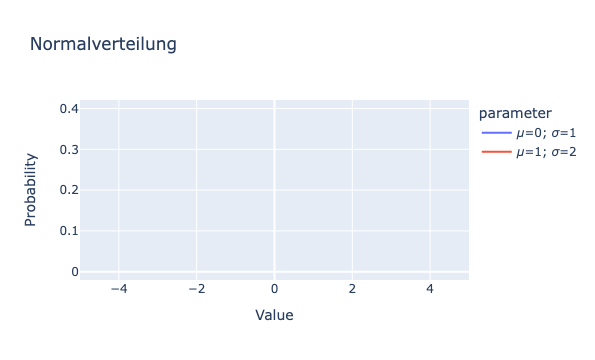

In [20]:
df=[]
x = np.linspace(stats.norm.ppf(0.001), stats.norm.ppf(0.999), NN)
y = stats.norm.pdf(x)
mu,v = 0, 1
df.append(pd.DataFrame({"x": x*v+mu, "y": y, "parameter":f"<i>μ</i>={mu}; <i>σ</i>={v}"}))

mu,v = 1, 2
df.append(pd.DataFrame({"x": x*v+mu, "y": y/v, "parameter":f"<i>μ</i>={mu}; <i>σ</i>={v}"}))

fig = px.line(pd.concat(df), x="x", y="y", color="parameter", range_x=[-5,5], labels={"x": "Value", "y": "Probability"}, title="Normalverteilung")
fig.show()

#### Gleichverteilung

Bei der Gleichverteilung ist die Wahrscheinlichkeit für alle Ereignisse gleich über einen festen Bereich, außerhalb dieses Bereiches ist sie null. Die Gleichverteilung kann sowohl kontinuierlich als auch diskret sein. In der Natur ist sie zum Beispiel beim Würfeln zu beobachten. Auch Computer erzeugte Zahlen sind meist Gleichverteilt.

Die Bereichsgrenzen $a$ und $b$ sind die Parameter der Gleichverteilung die definiert ist als:

$$
f(x) = \begin{cases}
  \frac{1}{b-a} & \text{for } a \le x \le b, \\[8pt]
  0 & \text{for } x < a \ \text{ or } \ x > b.
  \end{cases}
$$

Zu erkennen ist die Geleichverteilung an der kastenähnlichen Verteilung.

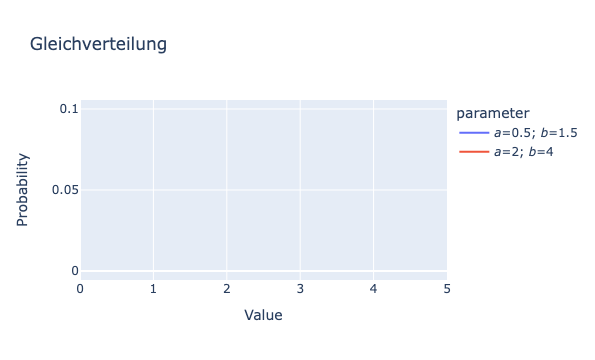

In [21]:
df = []
x = np.linspace(-5, 5, NN)
a, b = 0.5, 1.5
y = stats.uniform.pdf(x)
df.append(pd.DataFrame({"x": x*(b-a)+a, "y": y/10, "parameter":f"<i>a</i>={a}; <i>b</i>={b}"}))

a, b = 2, 4
df.append(pd.DataFrame({"x": x*(b-a)+a, "y": y/20, "parameter":f"<i>a</i>={a}; <i>b</i>={b}"}))

fig = px.line(pd.concat(df), x="x", y="y", color="parameter", range_x=[0,5], labels={"x": "Value", "y": "Probability"}, title="Gleichverteilung")
fig.show()

## Exponentialverteilung



Bei der Exponentialverteilung sind die Auftrittswahrscheinlichkeiten durch die Exponentialfunktion beschreibbar. Hierbei ist die Wahrscheinlichkeit, dass ein Wert 0 oder klein ist, deutlich größer als das er groß ist. Die Exponentialverteilung tritt oft bei der Modellierung von Zeiten bis zum Eintritt von Ereignissen auf, die im Durchschnitt mit konstanter Rate eintreten, z.B. die Lebensdauer von Atomen bei radioaktiven Zerfällen oder die Wartezeiten zwischen Anrufen in einem Call-Center.

Die Exponentialverteilung ist durch die negative Exponentialfunktion definiert und kann damit nur positive Werte annehmen. Der charakteristische Parameter $\lambda$ wird oft auch als Auftrittsrate oder Bearbeitungsrate bezeichnet. Formal ist die Verteilung definiert durch

$$
f(x) = \begin{cases}
\lambda  e^{ - \lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases}
$$

Zu erkennen ist die Verteilung an der Exponentialfunktion und der hohen Wahrscheinlichkeit von Werten die 0 oder fast 0 sind. Ferner ist sie typisch für Variablen die Zeiten zwischen Ereignissen modellieren, die mit konstanter Rate auftreten.

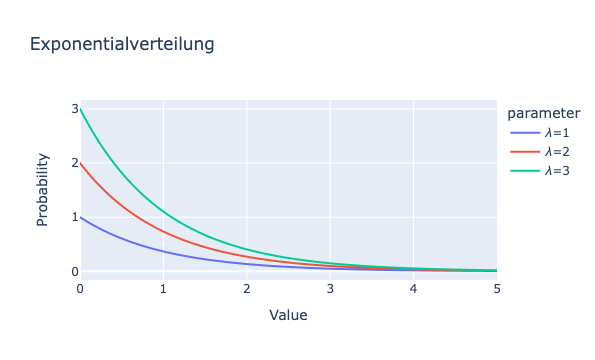

In [22]:
df = []
l = 1
x = np.linspace(0.001, 5, NN)
y = stats.expon.pdf(x)
df.append(pd.DataFrame({"x": x, "y": y*l, "parameter":f"<i>λ</i>={l}"}))

l = 2
y = stats.expon.pdf(x)
df.append(pd.DataFrame({"x": x, "y": y*l, "parameter":f"<i>λ</i>={l}"}))

l = 3
y = stats.expon.pdf(x)
df.append(pd.DataFrame({"x": x, "y": y*l, "parameter":f"<i>λ</i>={l}"}))

fig = px.line(pd.concat(df), x="x", y="y", color="parameter", range_x=[0,5], labels={"x": "Value", "y": "Probability"}, title="Exponentialverteilung")
fig.show()

#### Pareto-Verteilung

Die Pareto-Verteilung, benannt nach Vilfredo Pareto, gleicht im ersten Eindruck der Exponentialverteilung. Sie wird oft verwendet, um Phänomene zu modellieren, bei denen eine kleine Anzahl von Elementen einen Großteil der Gesamtwerte ausmacht. Sie wird häufig in wirtschaftlichen und sozialen Studien verwendet, um die Verteilung von Einkommen, Vermögenswerten oder anderen Ressourcen zu beschreiben. (z.B. das 20/80-Prinzip: 20% der Arbeit führen zu 80% der Ergebnisse).

Die Wahrscheinlichkeitsdichte der Pareto-Verteilung basiert nicht auf der Exponentialverteilung sondern ist proportional zu $1/x^k$. Sie wird bestimmt durch den Offset $x_{\min}>0$ und der Steigung $k>0$.

$$
f(x)=
    \begin{cases}\displaystyle
        \frac{k x_{\min}^k}{x^{k+1}} & x\geq x_{\min}, \\
        0                            & x<x_{\min}.
    \end{cases}
$$

Die Verteilung sieht erstmal der Exponentialverteilung ähnlich, hat aber eine andere, flexiblere Form, die durch die zwei Parameter bestimmt ist. Sie liegt meist vor bei Werten, bei denen einige wenige Elemente einen Großteil der Gesamtwerte ausmachen.

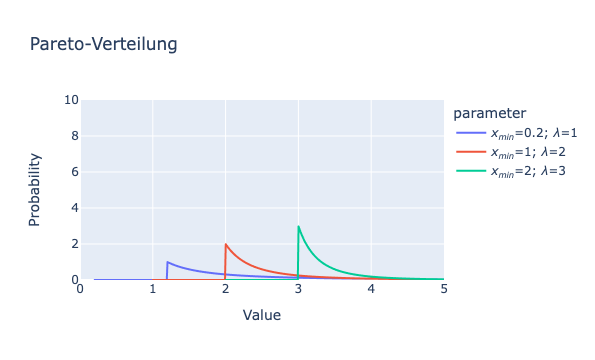

In [23]:
df=[]
b,xm = 1, 0.2
x = np.linspace(0.001, 10, NN)
y = stats.pareto.pdf(x, b)
df.append(pd.DataFrame({"x": x+xm, "y": y, "parameter":f"<i>x<sub>min</sub></i>={xm}; <i>λ</i>={b}"}))

b,xm = 2, 1
y = stats.pareto.pdf(x, b)
df.append(pd.DataFrame({"x": x+xm, "y": y, "parameter":f"<i>x<sub>min</sub></i>={xm}; <i>λ</i>={b}"}))

b,xm = 3, 2
y = stats.pareto.pdf(x, b)
df.append(pd.DataFrame({"x": x+xm, "y": y, "parameter":f"<i>x<sub>min</sub></i>={xm}; <i>λ</i>={b}"}))

fig = px.line(pd.concat(df), x="x", y="y", color="parameter", range_x=[0,5], range_y=[0,10], labels={"x": "Value", "y": "Probability"}, title="Pareto-Verteilung")
fig.show()

#### Gammaverteilung

Die Gammaverteilung ist eine kontinuierliche Wahrscheinlichkeitsverteilung, die sowohl der Exponentialverteilung gleichen kann als auch der Normalverteilung. Die Gammaverteilung wird häufig verwendet, um die Summe von unabhängigen Exponentialverteilungen zu modellieren. Sie kann als eine verallgemeinerte Exponentialverteilung angesehen werden. Sie wird häufig verwendet, um die Wartezeit bis zum Auftreten eines Ereignisses zu modellieren, sowie in verschiedenen anderen Anwendungen.

Die Parameter der Gammaverteilung ist der Formparameter $\alpha>0$ und der Skalen- oder Ratenparamter $\beta>0$. Die Verteilung ist positiv definiert durch

$$
 f(x) = \begin{cases}
\frac{ x^{\alpha-1} e^{-\beta x} \beta^\alpha}{\Gamma(\alpha)}, x\geq0 ,\\
0,  x<0.
\end{cases}
$$

Die Gammaverteilung kann man von der Exponentialverteilung durch linksseitigen Anstieg unterscheiden. Die Gammaverteilung kann rechtschief und linksschief sein. Wenn die Summe von Exponentialverteilungen modelliert werden soll, ist die Gammaverteilung die richtige Wahl.

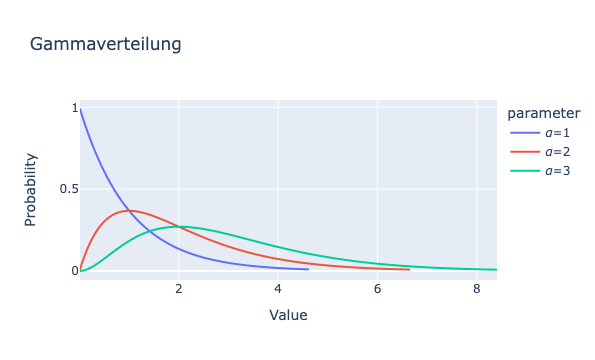

In [24]:
a,b = 1,1
df=[]
x = np.linspace(0.01, stats.gamma.ppf(0.99,a), NN)
y = stats.gamma.pdf(x, a)
df.append(pd.DataFrame({"x": x, "y": y, "parameter":f"<i>α</i>={a}"}))

a = 2
x = np.linspace(0.01, stats.gamma.ppf(0.99,a), NN)
y = stats.gamma.pdf(x, a)
df.append(pd.DataFrame({"x": x, "y": y, "parameter":f"<i>α</i>={a}"}))

a = 3
x = np.linspace(0.01, stats.gamma.ppf(0.99,a), NN)
y = stats.gamma.pdf(x, a)
df.append(pd.DataFrame({"x": x, "y": y, "parameter":f"<i>α</i>={a}"}))

fig = px.line(pd.concat(df), x="x", y="y", color="parameter", labels={"x": "Value", "y": "Probability"}, title="Gammaverteilung")
fig.show()

#### Weibul-Verteilung

Die Weibull-Verteilung wird häufig verwendet, um die Lebensdauer von Materialien und Bauteilen zu modellieren. Sie findet auch Anwendung in der Meteorologie, der Hydrologie und der Zuverlässigkeitstechnik und Ausfallzeitanalyse. 

Die Weibull-Verteilung kann als ein Spezialfall der Gammaverteilung angesehen werden, wenn der Form-Parameter $\alpha$ gleich 1 ist. Sie ist definiert durch den Formparameter $k>0$ und den Skalierungsparameter $\lambda>0$ der Verteilung

$$
f(x) =
\begin{cases}
\frac{k}{\lambda}\left(\frac{x}{\lambda}\right)^{k-1}e^{-(x/\lambda)^{k}}, & x\geq0 ,\\
0, & x<0.
\end{cases}
$$

Im Gegensatz zur Gammaverteilung ist die Weibull-Verteilung immer rechtsschief. Wenn die Lebensdauer von Materialien oder Bauteilen modelliert werden soll, ist die Weibull-Verteilung oft die richtige Wahl.

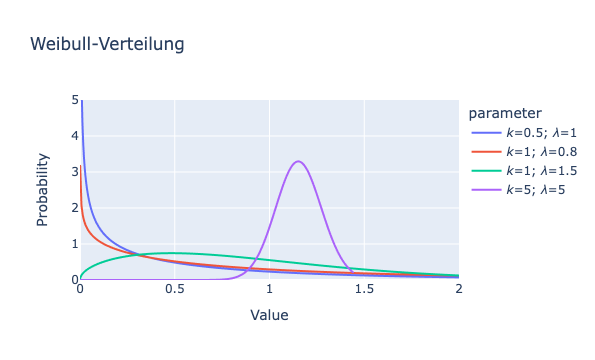

In [25]:
df = []
a, c = 0.5, 1
x = np.linspace(0.001, stats.exponweib.ppf(0.99,a, c), NN)
y = stats.exponweib.pdf(x,a, c)
df.append(pd.DataFrame({"x": x, "y": y, "parameter":f"<i>k</i>={a}; <i>λ</i>={c}"}))

a, c = 1, 0.8
x = np.linspace(0.001, stats.exponweib.ppf(0.99,a, c), NN)
y = stats.exponweib.pdf(x,a, c)
df.append(pd.DataFrame({"x": x, "y": y, "parameter":f"<i>k</i>={a}; <i>λ</i>={c}"}))

a, c = 1, 1.5
x = np.linspace(0.001, stats.exponweib.ppf(0.99,a, c), NN)
y = stats.exponweib.pdf(x,a, c)
df.append(pd.DataFrame({"x": x, "y": y, "parameter":f"<i>k</i>={a}; <i>λ</i>={c}"}))

a, c = 5, 5
x = np.linspace(0.001, stats.exponweib.ppf(0.99,a, c), NN)
y = stats.exponweib.pdf(x,a, c)
df.append(pd.DataFrame({"x": x, "y": y, "parameter":f"<i>k</i>={a}; <i>λ</i>={c}"}))

fig = px.line(pd.concat(df), x="x", y="y", color="parameter", range_y=[0,5], range_x=[0,2], labels={"x": "Value", "y": "Probability"}, title="Weibull-Verteilung")
fig.show()

#### Betaverteilung

Die Betaverteilung ist eine Familie von kontinuierlichen Wahrscheinlichkeitsverteilungen auf dem Intervall $[0, 1]$, die durch zwei positive Parameter kontrolliert wird. Sie wird oft in der Bayes-Statistik verwendet.

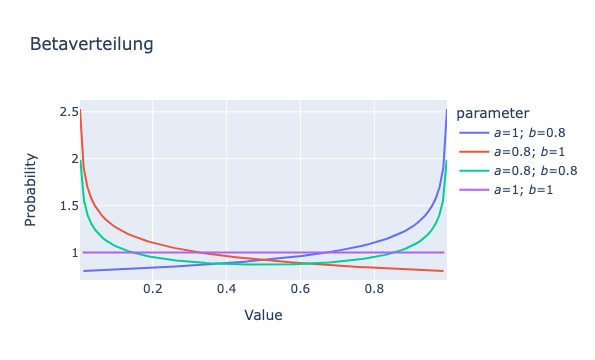

In [26]:
df = []

a, b = 1, 0.8
x = np.linspace(stats.beta.ppf(0.01,a, b), stats.beta.ppf(0.99,a, b), 100)
y = stats.beta.pdf(x,a, b)
df.append(pd.DataFrame({"x": x, "y": y, "parameter":f"<i>a</i>={a}; <i>b</i>={b}"}))

a, b = 0.8, 1
x = np.linspace(stats.beta.ppf(0.01,a, b), stats.beta.ppf(0.99,a, b), 100)
y = stats.beta.pdf(x,a, b)
df.append(pd.DataFrame({"x": x, "y": y, "parameter":f"<i>a</i>={a}; <i>b</i>={b}"}))

a, b = .8, .8
x = np.linspace(stats.beta.ppf(0.01,a, b), stats.beta.ppf(0.99,a, b), 100)
y = stats.beta.pdf(x,a, b)
df.append(pd.DataFrame({"x": x, "y": y, "parameter":f"<i>a</i>={a}; <i>b</i>={b}"}))

a, b = 1, 1
x = np.linspace(stats.beta.ppf(0.01,a, b), stats.beta.ppf(0.99,a, b), 100)
y = stats.beta.pdf(x,a, b)
df.append(pd.DataFrame({"x": x, "y": y, "parameter":f"<i>a</i>={a}; <i>b</i>={b}"}))

fig = px.line(pd.concat(df), x="x", y="y", color="parameter", labels={"x": "Value", "y": "Probability"}, title="Betaverteilung")
fig.show()

### Diskrete Verteilungen
#### Binomialverteilung

Die Binomialverteilung beschreibt die Wahrscheinlichkeit einer bestimmten Anzahl von Erfolgen in einer Reihe von unabhängigen Versuchen mit fester Erfolgswahrscheinlichkeit. Sie wird z.B. verwendet, um die Anzahl der "Köpfe" beim Münzwurf zu modellieren.

Sie ist definiert mit der Anzahl der Versuche $n>0$ und der Erfolgs- oder Trefferwahrscheinlichkeit  $p \in [0,1]$ als Parameter zu

$$
P(k)=\begin{cases}
  \binom nk p^k (1-p)^{n-k} &\text{falls} \quad k\in\left\{0,1,\dots,n\right\},\\
  0            & \text{sonst.}\end{cases}
$$

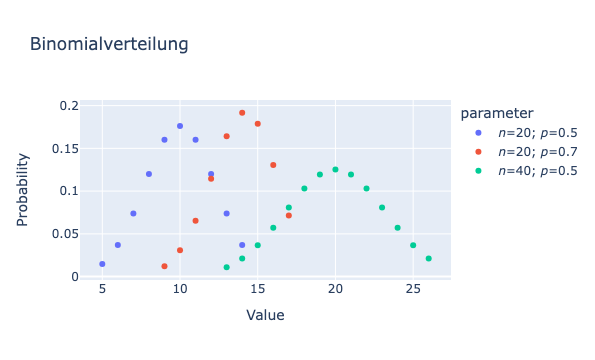

In [27]:
df = []
n, p = 20, 0.5
x = np.arange(stats.binom.ppf(0.01, n, p), stats.binom.ppf(0.99, n, p))
y = stats.binom.pmf(x, n, p)
df.append(pd.DataFrame({"x": x, "y": y, "parameter":f"<i>n</i>={n}; <i>p</i>={p}"}))

n, p = 20, 0.7
x = np.arange(stats.binom.ppf(0.01, n, p), stats.binom.ppf(0.99, n, p))
y = stats.binom.pmf(x, n, p)
df.append(pd.DataFrame({"x": x, "y": y, "parameter":f"<i>n</i>={n}; <i>p</i>={p}"}))

n, p = 40, 0.5
x = np.arange(stats.binom.ppf(0.01, n, p), stats.binom.ppf(0.99, n, p))
y = stats.binom.pmf(x, n, p)
df.append(pd.DataFrame({"x": x, "y": y, "parameter":f"<i>n</i>={n}; <i>p</i>={p}"}))

fig = px.scatter(pd.concat(df), x="x", y="y", color="parameter", labels={"x": "Value", "y": "Probability"}, title="Binomialverteilung")
fig.show()

#### Poisson-Verteilung

Die Poisson-Verteilung beschreibt die Wahrscheinlichkeit einer bestimmten Anzahl von Ereignissen in einem bestimmten Zeitintervall oder einer bestimmten Fläche. Sie wird z.B. verwendet, um die Anzahl der Anrufe in einem Callcenter pro Stunde zu modellieren.

Die Poisson-Verteilung ist beschrieben durch die Ereignishäufigkeit $\lambda$ zu

$$
P (k) = \frac{\lambda^k}{k!}\, \mathrm{e}^{-\lambda}.
$$

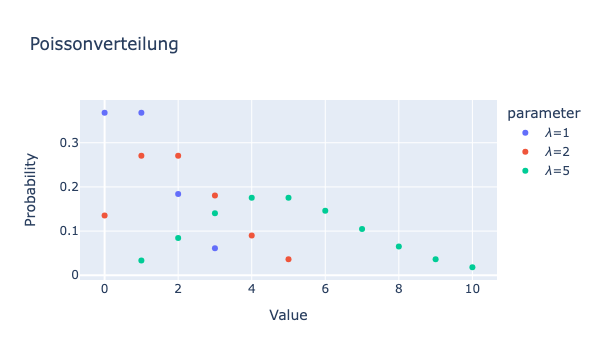

In [28]:
df = []

mu = 1
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
y = stats.poisson.pmf(x, mu)
df.append(pd.DataFrame({"x": x, "y": y, "parameter":f"<i>λ</i>={mu}"}))

mu = 2
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
y = stats.poisson.pmf(x, mu)
df.append(pd.DataFrame({"x": x, "y": y, "parameter":f"<i>λ</i>={mu}"}))

mu = 5
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
y = stats.poisson.pmf(x, mu)
df.append(pd.DataFrame({"x": x, "y": y, "parameter":f"<i>λ</i>={mu}"}))

fig = px.scatter(pd.concat(df), x="x", y="y", color="parameter", labels={"x": "Value", "y": "Probability"}, title="Poissonverteilung")
fig.show()

<div id="tsparticles_question" style="width: 100%; height:5em; background-color: white;">
    <div class="questions" style="letter-spacing: 0.03em; font-family: Protomolecule; font-size: 2.3em; position: absolute; top: 50%; left: 50%; transform: translate(-50%, -50%); color: black; z-index: 5;">f&nbsp;&nbsp;r&nbsp;&nbsp;a&nbsp;&nbsp;g&nbsp;&nbsp;e&nbsp;&nbsp;n&nbsp;&nbsp;?</div>
</div>